# Исследование факторов, влияющих на успех игры

Из открытых источников имеются исторические данные о продажах игр разных жанров на разных платформах, а также их рейтингах, оценках от игроков и критиков. Цель исследования — выявить закономерности, которые влияют на успешность игры.

Анализ будет проводится на основе данных до 2016 года. Перед началом исследования данные будут описаны и предобработаны. В случае обнаружения ошибок, они будут утсранены. Кроме того, будут добавлены некоторые рассчетные параметры для дальнейшего анализа.

После предобработки и добавления необходимых параметров, мы опишем продажи игр в зависимости от жанра, платформы, рейтинга ESRB, средних пользовательских оценок и оценок критиков.

В работе будут проверены две гипотезы (для выработки общего механизма):
    - средние оценки на платформах XOne и PC одинаковые;
    - средние оценки игр жанров `Sports` и `Action` отличаются.
    
В конце будет сделан вывод и даны рекомендации по использованию бюджета.

## Обзор данных

In [1]:
#импортируем необходимые библиотеки

import pandas as pd

import seaborn as sns

import numpy as np

import scipy.stats as st

from matplotlib import pyplot as plt

In [2]:
#читаем датасет

df = pd.read_csv('games.csv')

Посмотрим первые строчки исходного датасета и общую информацию о нем.

In [3]:
df.head(15) #выводим первые строки датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info() #общая информация по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В исходной таблице 10 стоблцов.

- `Name` хранит информацию о названии игры;
- `Platform` — платформа, на которой она выпущена;
- `Year_of_Release` — год выпуска игры;
- `Genre` — жанр;
- `NA_sales` — миллионы проданных копий в Америке;
- `EU_sales` — количество проданных копий в Европе (миллионы);
- `JP_sales` — количество проданных в Японии копий (миллионы);
- `Other_sales` — миллионы продаж в других регионах;
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` —  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
df.describe() #смотрим агреггированные данные по датасету

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Отметим сразу пропуски в столбцах с годом выпуска, оценкой критиков, а также отсутствием подсчета по столбцу с оценкой пользователей из-за неподходящего типа данных `object`.

Минимальное значение `0` в столбцах с информацией о продажах говорит либо, что не для всех игр доступны данные, либо какие то из них совсем не продавались — к этому вопросу нужно будет вернуться позже. Интересно, что они отсутствуют у 25% игр в Америке и Европе, и у 50% - в Японии.

Лучшая оценка критиков — 98 баллов, а максимальное количество проданных копий в Америке - 41 млн. Интересно, это одна и та же игра?

In [6]:
df[df['Critic_Score']==98]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
51,Grand Theft Auto IV,X360,2008.0,Action,6.76,3.07,0.14,1.03,98.0,7.9,M
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
227,Tony Hawk's Pro Skater 2,PS,2000.0,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T
5350,SoulCalibur,DC,1999.0,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T


In [7]:
df[df['NA_sales'] > 41]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Как оказалось, нет — лучшие оценки критиков получила **GTA IV** (на двух платформах), **TH's Pro Skater 2** и **SoulCalibur**, а наибольшее количество проданных копий среди игр, у которых такая информация имеется, у **WiiSports**, которая предложила игрокам в 2006 революционный игровой контроллер.

## Подготовка данных

На этапе обзора данных мы отметили пропуски и другие проблемы в данных, которые требуется решить прежде, чем перейти к анализу данных и проверке гипотез.

### Переименование столбцов

Прежде всего, приведем названия стобцов в датафрейме к единому стандарту — напишем их в нижнем регистре.

In [8]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
 df.columns = df.columns.str.lower() 

Для удобства обработки приведем к нижнему регистру содержимое катергориальных столбцов.

In [10]:
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df['rating'] = df['rating'].str.lower()

In [11]:
df.head() # проверка вида таблицы после переименования столбцев и изменения регистра

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных

Ранее мы отметили проблемы с типом данных в столбце `user_score`.
Прежде, чем перейти к преобразованию типа данных, взглянем на уникальные значения оценок.

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце помимо числовых значений и `NaN` присутствует строковое значение `tbd`. Посмотрим, что это за игры.

In [13]:
df[df['user_score'] =='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,Namco Museum: 50th Anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,Zumba Fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,uDraw Studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
657,Frogger's Adventures: Temple of the Frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,e
16697,Bust-A-Move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e
16698,Mega Brain Boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e
16704,Plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


2424 игры имеют оценку пользователей `tbd`. Вероятно, это сокращение от `To Be Determined` — т. е. "Будет определено". Судя по тому, что у игр разный год выпуска, дело в недостаточном количестве оценок от пользователей — но об этом нельзя сказать с уверенностью, т.к. например, "Zumba Fitness" имеет более 3 млн проданных копий в Америке и оценок должно быть достаточно.

Для обработки значений заменим `tbd` на `NaN` т.к. смысл примерно одинаковый.

In [14]:
df = df.replace({'user_score':{'tbd':np.NaN}}) #заменяем tbt на NaN с применением модуля numpy

In [15]:
df['user_score'] = df['user_score'].astype('float64') #теперь преобразуем тип данных

Для удобства сопоставления оценки пользователей и критиков, сразу приведем значения в столбце `user_score` к стобальной шкале, путем домножения значений.

In [16]:
df['user_score'] = df['user_score']*10

Заметим, что после преобразования количество пропусков в `user_score` увеличилось на количество значений `tbd`

В столбце `year_of_release` и `critic_score` данные следует привести к формату `float32` для экономии используемой памяти.

In [17]:
df['year_of_release'] = df['year_of_release'].astype('float32')
df['critic_score'] = df['critic_score'].astype('float32')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float32
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float32(2), float64(5), object(4)
memory usage: 1.3+ MB


In [19]:
df.head() #посмотрим датасет после преобразований

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,e
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,83.0,e
3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,80.0,e
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Проверка на явные дубликаты

In [20]:
df.duplicated().sum()

0

Явных дубликатов в датасете нет

### Обработка пропусков

В столбце `name` всего два пропуска - посмотрим на них.

In [21]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У неизвестной игры №1 совсем неплохие продажи — более 2 млн копий.

Игры с пропущенными названиями — это те же игры, у которых пропущены жанры и отсутствуют пользовательсике оценки. Название платформы  и год выпуска вряд ли помогут нам определить, причину популярности одной и неудачи второй, и сделать какие то общие выводы, которые можно будет учесть при прогнозах продаж новых игр. 

In [22]:
df = df.dropna(how='any', subset=['name'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float32
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float32(2), float64(5), object(4)
memory usage: 1.4+ MB


Теперь обратимся к пропускам в столбце `year_of_release`.

In [24]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,85.0,e
377,FIFA Soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,64.0,e
456,LEGO Batman: The Videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,79.0,e10+
475,wwe Smackdown vs. Raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,NaN,e10+
16405,Freaky Flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,65.0,t
16448,Inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,67.0,m
16458,Hakuouki: Shinsengumi Kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У 269 игр не указан год выпуска. Это 1,6 % от всех игр в датасете. Мы оставим эти строки с пропусками, но будем учитывать в дальнейшем при анализе.

Теперь переходим к играм с отсутствующими оценками критиков или пользователей.

In [25]:
df['critic_score'].isna().sum()

8576

In [26]:
df['user_score'].isna().sum()

9123

In [27]:
df['rating'].isna().sum()

6764

In [28]:
df[(df['critic_score'].isna())&(df['user_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [29]:
df[(df['critic_score'].isna())&(df['user_score'].isna())&(df['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Почти гарантированно, что у игры с отсутствующим рейтингом от организации ESRB (англ. Entertainment Software Rating Board), нет оценки пользователей и критиков.

Тем не менее, на такие игры приходится почти 40% всего датасета (а оценка пользователей отсутствует у более, чем половины датасета). Отбросить их по этой причине не представляется возможным.

Посмотрим внимательнее на пропуски в стобце с рейтингом ESRB `rating`. Но сначала посмотрим на сами значения рейтинга.

In [30]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

- `e` — everyone: такая игра подходит всем возрастам;
- `m` — mature: для взрослой аудитории, старше 17 лет;
- `t` — teen: для лиц от 13 лет;
- `e10+` — everyone older than 10: от 10 и старше;
- `k-a` — kids to adults: это старое обозначения для игр рейтинга `e`
- `ao` — adults only: игры с жестоким или откровенным сексуальным содержанием, имеют ограничения на продажи;
- `ec` — early childhood: развивающие игры для детей младшего возраста;
- `rp` — rating pending: игра ожидает присвоения рейтинга — используется на демоверсиях.

Рейтинги `e` и `k-a` являются синонимами - соответственно их можно объединить под одно значение.

In [31]:
df = df.replace({'rating':{'k-a':'e'}})

In [32]:
df[df['rating'].isna()] #пропуски

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в данных по рейтингу имеются в разных годах - соответственно, они не связаны с ожиданием рейтинга. Для того, чтобы не потерять строки с неопределенным рейтингом при группировке, заменим значения NaN на `undefined`.

In [33]:
df['rating'] = df['rating'].fillna('undefined')

### Расчет общих продаж игры

Для анализа данных необходимо посмотреть на общие продажи игры во всех регионах. Для этого добавим в датасет столбец `total_sales`

In [34]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [35]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,e,82.54
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,83.0,e,35.52
3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,80.0,e,32.77
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined,30.26
6,New Super Mario Bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,85.0,e,29.80
7,Wii Play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,66.0,e,28.91
8,New Super Mario Bros. Wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,84.0,e,28.32
9,Duck Hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined,28.31


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float32
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float32(2), float64(6), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

После предобработки данных, можно перейти к их исследованию.

Для начала посмотрим на выпуск игр по годам.

### Выпуск игр по годам

In [37]:
df['year_of_release'].value_counts().sort_index() # для начала посмотрим в формате таблицы

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

Text(0.5, 1.0, 'Выпуск игр по годам')

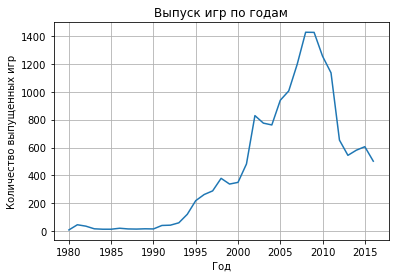

In [38]:
df['year_of_release'].value_counts().sort_index().plot(grid=True) # а теперь на графике
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.title('Выпуск игр по годам')

Если предположить, что в датасет попало большинство релизов за каждый год, то можно утверждать что после 1993 количество выпускаемых игр резко пошло вверх и росло вплоть до кризиса 2008 года. После этого количество релизов пошло на спад и достигло дна в 2013 году. 

С поправкой на то, что данные за 2016 год могут быть неполными, количество выпускаемых игр продолжает расти - вероятно, люди вновь увлеклись виртуальными мирами.

### Выпуск игр по платформам

Нам вряд ли важны "архивные" данные - но какие важны, еще следует определить. Посмотрим на выпуск игр для разных платформ, и постараемся определить средний "срок жизни" платформы, чтобы знать какие платформы являются перспективными на 2017 - 2018 гг.

In [39]:
platform_sales = df.pivot_table(index=['platform','year_of_release']
                                , values='total_sales', aggfunc='sum').reset_index(level=['platform','year_of_release'])

In [40]:
platform_sales.head(20)
    

,platform,year_of_release,total_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
5,2600,1985.0,0.45
6,2600,1986.0,0.67
7,2600,1987.0,1.94
8,2600,1988.0,0.74
9,2600,1989.0,0.63


In [41]:
platform_sales.describe()

,year_of_release,total_sales
count,238.000000,238.000000
mean,2002.474790,37.035168
std,9.030036,48.493792
min,1980.000000,0.020000
25%,1996.000000,3.620000
50%,2003.000000,16.055000
75%,2010.000000,50.477500
max,2016.000000,211.810000


Посмотрим на выручку каждый платформы по годам. 

C:\Users\rizho\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


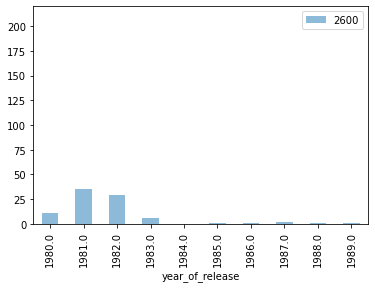

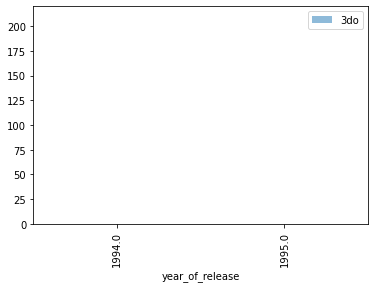

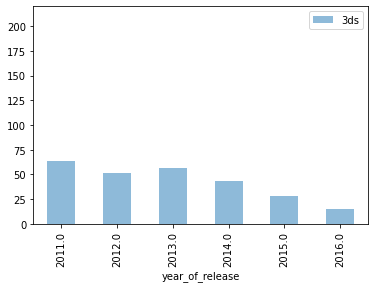

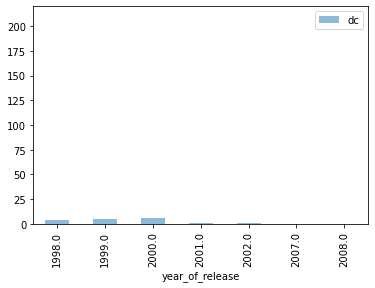

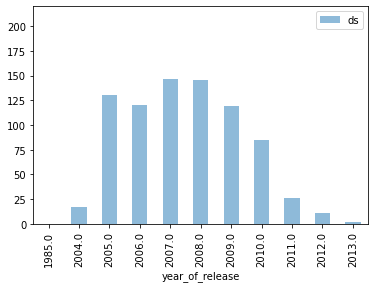

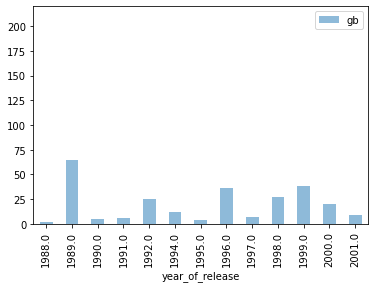

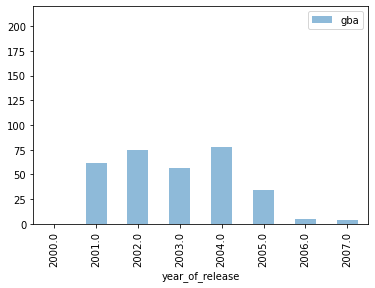

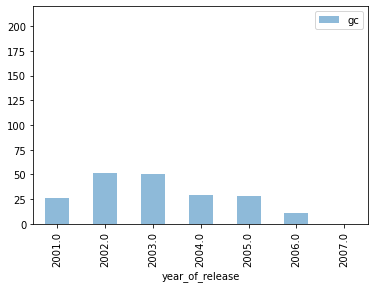

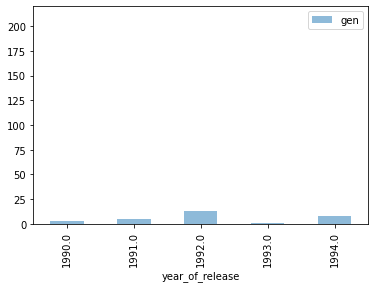

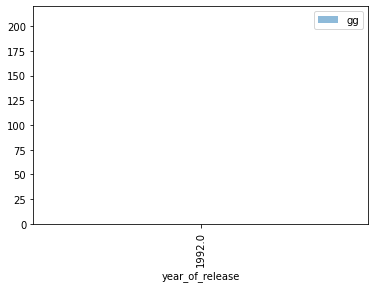

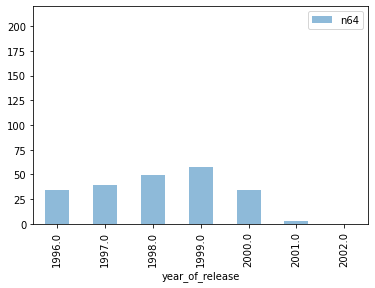

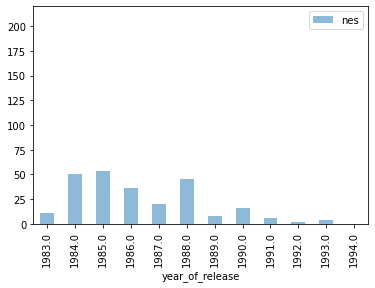

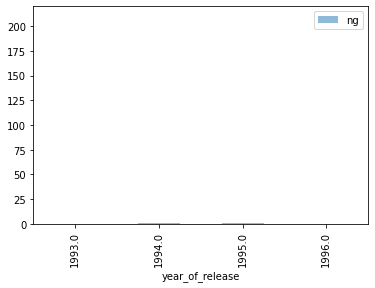

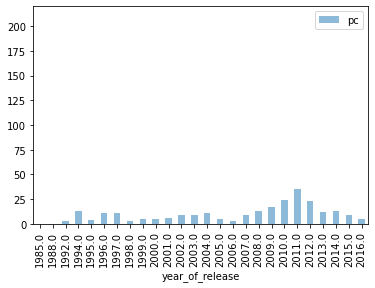

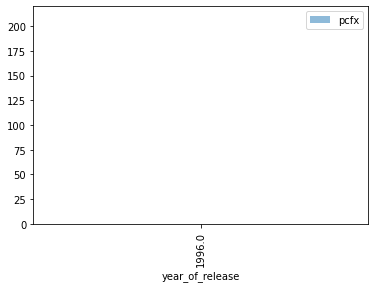

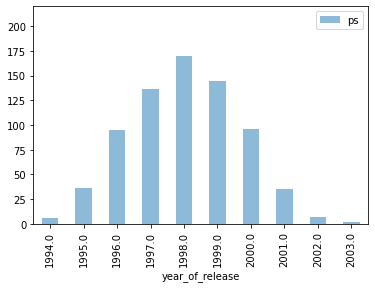

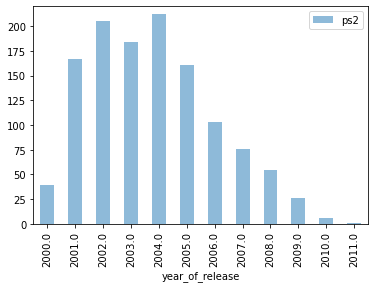

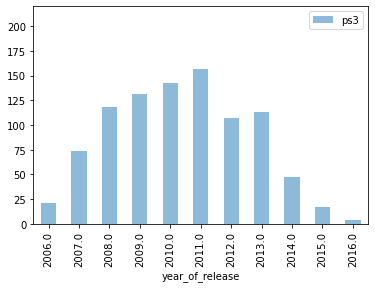

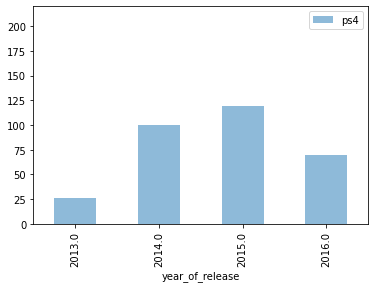

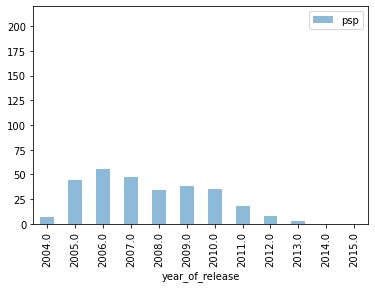

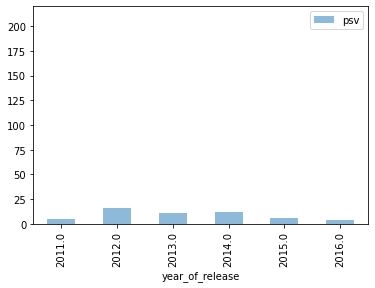

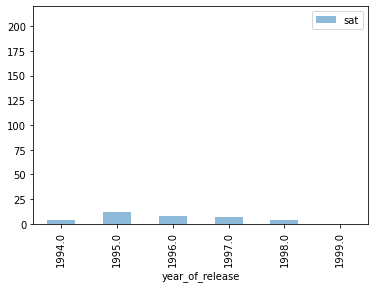

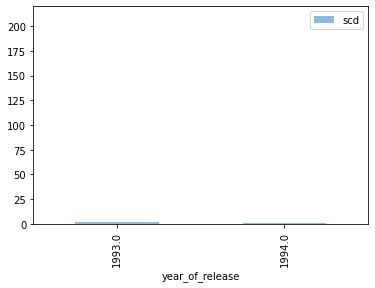

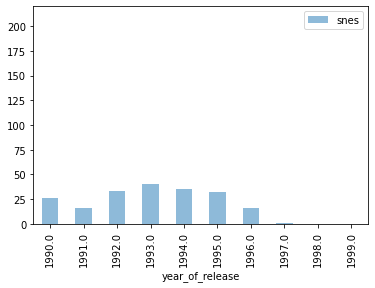

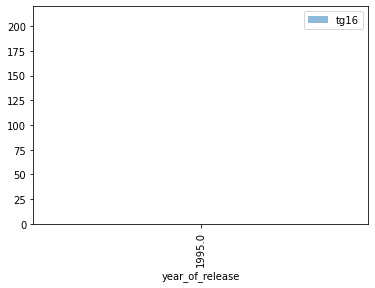

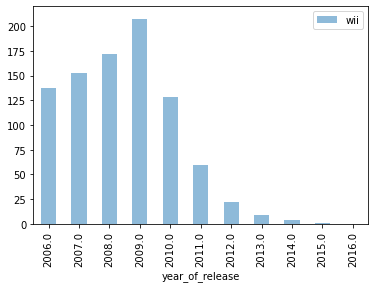

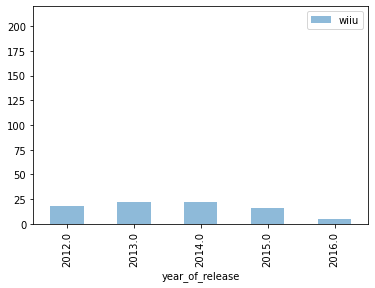

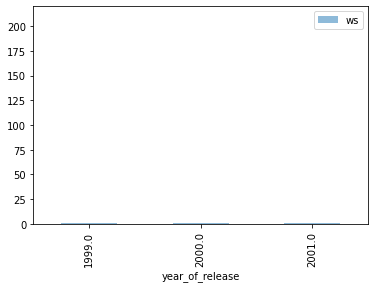

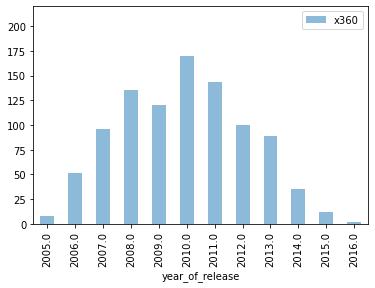

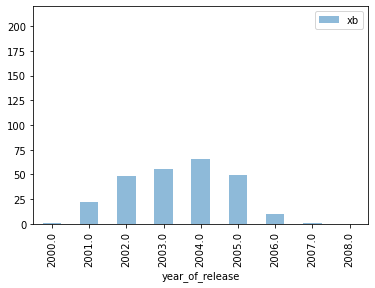

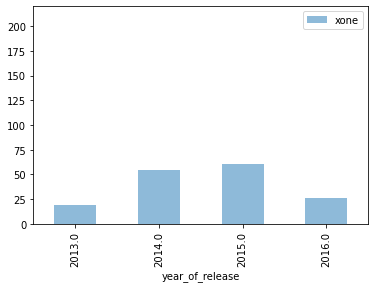

In [42]:
for platform in platform_sales['platform'].unique():
    platform_sales[platform_sales['platform']==platform].plot(kind='bar',
                                                              x='year_of_release',
                                                              y='total_sales',
                                                              alpha=0.5,
                                                              legend=True,
                                                              label=platform,
                                                              ylim=(0,220)
                                                              )


У платформы `ds`, за которой скрывается Nintendo DS, выпущенная в 2004 году на графике в легенду включен 1985 год, что свидетельствует о аномальном значенении в датасете. Посмотрим на него.

In [43]:
df[(df['platform']=='ds')&(df['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,ds,1985.0,action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


Судя по информации об игре в интернете, игра вышла в 2010 году - исправим значение года выпуска.

In [44]:
df.loc[df['name']=='Strongest Tokyo University Shogi DS', 'year_of_release'] = 2010

In [45]:
len(platform_sales['platform'].unique())

31

Видно, что срок жизни платформ отличается - некоторые просуществовали всего год (`WS`), другие - более 10 лет (`GB`).

Кроме того, что уже сейчас можно увидеть зависимость от выручки с платформы и сроком ее "жизни". Чем меньше выручка - тем короче срок жизни.

Основные приставки - "PS", "XBox","NES","X360", "PS2","PS3","GB","DS" — прожили по  8-10 лет, с поправкой а то, что основные продажи обычно приходятся на 2-6 года жизни. Соответсвенно, если мы имем платформы, которые нужно рассматривать для портации игры, следует учитывать данные за последние 3-4 года, чтобы в выборку попали только еще живые приставки, в которые будут играть хотя бы еще пару лет.

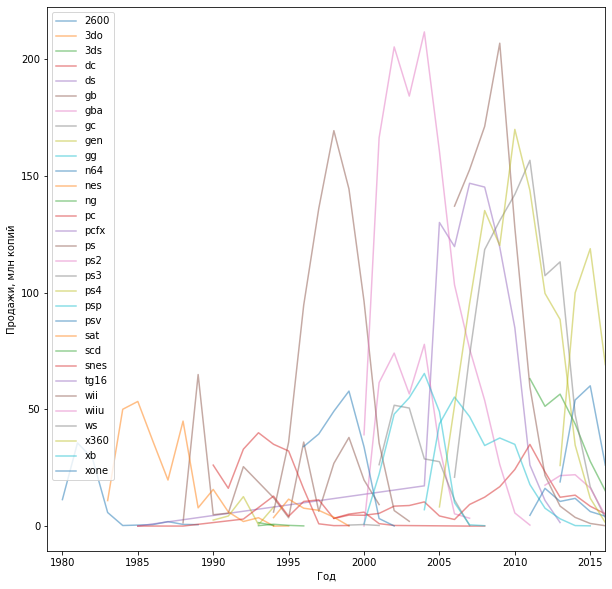

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim([1979.0,2016.0])

for platform in platform_sales['platform'].unique():
    platform_sales[platform_sales['platform']==platform].plot(kind='line',
                                                              x='year_of_release',
                                                              y='total_sales',
                                                              alpha=0.5,
                                                              legend=True,
                                                              label=platform,
                                                              ax=ax)
plt.xlabel("Год")
plt.ylabel('Продажи, млн копий')
plt.show()

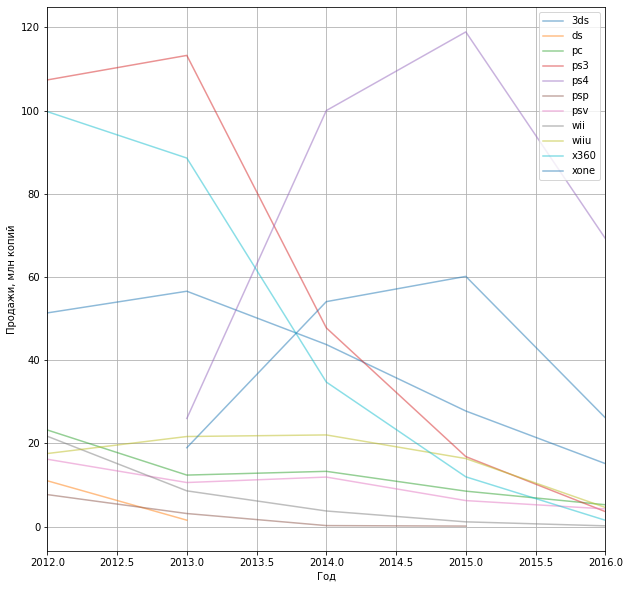

In [47]:
platform_sales_last4 = platform_sales[platform_sales['year_of_release']>=2012]

fig, ax = plt.subplots(figsize=(10,10))
plt.xlim([2012,2016])

for platform in platform_sales_last4['platform'].unique():
    platform_sales_last4[platform_sales_last4['platform']==platform].plot(kind='line',
                                                              x='year_of_release',
                                                              y='total_sales',
                                                              alpha=0.5,
                                                              legend=True,
                                                              label=platform,
                                                              grid=True,
                                                              ax=ax)
plt.xlabel("Год")
plt.ylabel('Продажи, млн копий')
plt.show()

На графике видно, что даже за последние 4 года несколько канули в Лету несколько платформ (DS, PSP), еще пара близка к "смерти" (PS3 и X360). Еще один важное замечание - не стоит списывать со счетов PC - персональные компьютеры занимают стабильную долю рынка.

Потенциальный рост (с поправкой на неполноту данных за 2016 год) показывают платформы нового поколения — PS4, XOne. Потенциально успешной может быть и игра на Nintendo 3DS - эта приставка сохраняет определенную долю рынка, хотя и идет на спад.

Построим для игр, вышедших после 2012 года, диаграммы размаха в разбивке по платформам. Это позволит нам увидеть медианное значение по выручке игр на каждой платформе, а также выбросы - их большое количество будет означать возможность создать потенциальный бестселлер именно на этой платформе и заработать больше денег.

Для дальнейшей работы зафиксируем актуальны период (2013 год и далее) в датасете.

In [48]:
df_actual = df[df['year_of_release']>2012]

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

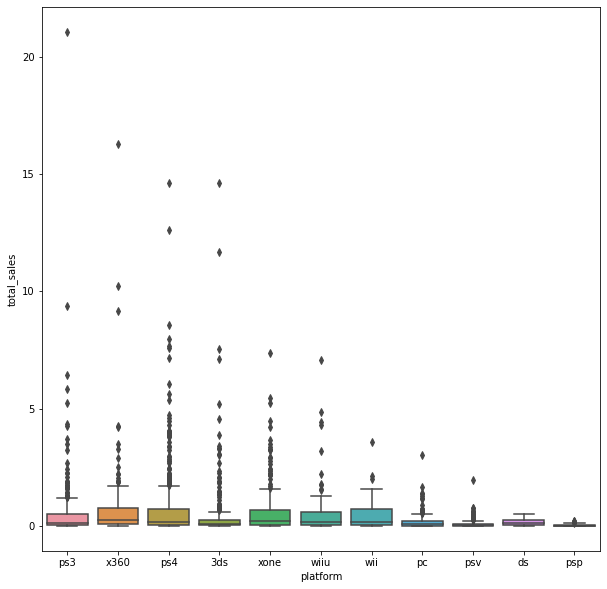

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df_actual, x='platform', y='total_sales')

Первое что бросается в глаза - у всех платформ один из "усов" диаграммы размаха упирается в нижнюю границу — то возможность продать меньше миллиона копий игры на любой платформе достаточна высока, а значит риск вложений в игровую индустрию тоже достаточно высок.

Построим еще одну диаграмму размаха по платформам, но установим лимит на значения продаж, чтобы детальнее взглянуть не на выбросы (хиты продаж), а на медианные значения.

(0.0, 3.0)

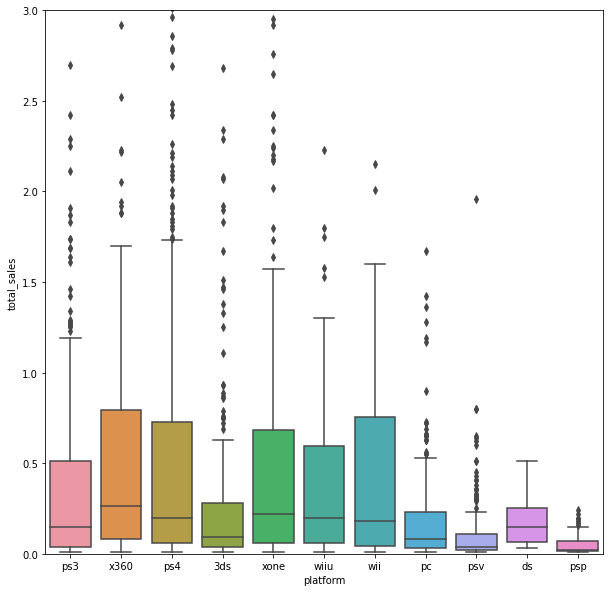

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df_actual, x='platform', y='total_sales')
ax.set_ylim(0,3)

Мы видем, что диапозон нормальных значений наиболее широкий у X360, PS4, XOne, WiiU и Wii. Соответвенно, здесь у большей доли игр продается "достаточное" количество копий.





Если сопоставить этот график с предыдущим, можно смело утверждать, что перспективными для разработки и портации являются платформы PS4 и XOne.

### Влияние оценок пользователей и критиков на продажи

С потенциально прибыльными платформами на ближайшие пару лет определились. Время посмотреть на другие факторы, влияющие на успех игры. 

До этого мы не смотрели на оценки пользователей и критиков - и сейчас попытаемся выяснить, есть ли зависимость между коммерческим успехом игры и тем, как ее приняло игровое сообщество.

Для анализа мы возьмем выборку по одной из интресующих нас платформ - PS4. Учитывая, что продажи PS4 начались только в конце 2013 года, мы сразу получим актуальный временной период.

In [51]:
PS4_stat = df[df['platform']=='ps4']

In [52]:
PS4_stat.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,252.000000,257.00000,392.000000
mean,2015.145386,0.277398,0.359923,0.040714,0.123342,72.091270,67.48249,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,12.485994,14.59481,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,15.00000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,66.000000,61.00000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.000000,70.00000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.000000,78.00000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,92.00000,14.630000


В среднем, продается 0.8 млн копий одной игры, но медианное значение продаж — всего 0.2 млн копий. Значит, что на платформе было выпущенно несколько хитов, которые сдвинули среднее значение сильно выше медианы.

Посмотрим, какая игра была самой успешной на PS4:

In [53]:
PS4_stat[PS4_stat['total_sales']>14]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63


Посмотрим на парную корреляцию между продажами и оценками пользователей и критиков.

In [54]:
PS4_stat[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


И так, мы видим, что продажи игры прямо коррелируют с оценкой критиков, однако коэффициент корреляции менее 0,5 - а значит, оценка критиков все-таки не является определяющим фактором успеха игры, хоть и важна.

Второе, что мы видим - прямую корреляцию между оценками критиков и игроков. Однако, и тут коэффициент корреляции далек от 1 — т.е. игроки могут потенциально поругать понравившуюся критикам игру или, наоборот, похвалить непонравившуюся. Кроме того, они очевидно расходятся в том сколько "классов" заслуживает игра.

Что наиболее интересно, мы видим отрицательную корреляцию между оценками пользователей и продажами игр. Для выборки по PS4 коэффициент корреляции -0.03 — фактически, значение близко к нулю и можно говорить, что корреляции нет совсем, однако, сам факт отрицательного значения достаточно любопытен. Могу предположить, что разочарованные пользователи чуть чаще хотят поделиться своим мнением.

Проиллюстрируем корреляцию на графиках.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

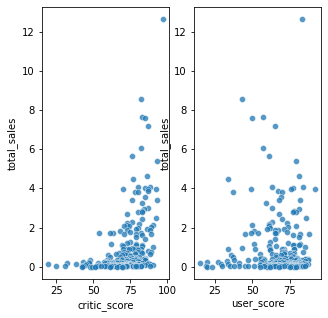

In [55]:
fig = plt.figure(figsize=(5,5))
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
sns.scatterplot(data=PS4_stat, x="critic_score", y="total_sales",alpha=0.75, ax=ax_1)
sns.scatterplot(data=PS4_stat, x="user_score", y="total_sales",alpha=0.75, ax=ax_2)

Кажется, причиной отсутствия сильной корреляции между параметрами, является большое количество игр с продажами менее млн. копий. Однако на графике отлично видно, как рассеяны продажи игр относительно пользовательских оценок. Мы видим игру, которая набрала менее 50 баллов у пользователей — если соотнести продажи, то эта же игра получила более высокую оценку от критиков.

In [56]:
PS4_stat[PS4_stat['total_sales']>8]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,83.0,m,12.62
77,FIFA 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,43.0,e,8.58


'FIFA 16' — отличная иллюстрация, что как критики стимулируют продажи.

Важно, что критики часто получают копию игры до официального релиза, и на их оценки игроки ориентируются, когда думают покупать ли себе это развлечение. А вот оценки пользователей игры получают "задним числом", когда покупка уже совершена.

### Влияние оценок критиков и пользователей на продажи на платформах-конкрурентах

Мы выявили влияние оценок критиков на продажи на платформе PS4 — перепроверим нашу теорию на одной из платформ-конкрурентов. Ради интереса возьмем `PC` — игры здесь выпускаются обычно чуть позже, чем на приставки и влияние оценок может быть меньше.

In [57]:
# для анализа используем актуальный срез с 2013 года
PC_stat = df_actual[df_actual['platform'] == 'pc']

In [58]:
PC_stat.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,189.000000,189.000000,189.000000,189.0,189.000000,149.000000,155.000000,189.000000
mean,2014.634888,0.058783,0.134180,0.0,0.015661,75.550339,62.696774,0.208624
std,1.100796,0.127805,0.212022,0.0,0.030198,10.508964,17.423813,0.352304
min,2013.000000,0.000000,0.000000,0.0,0.000000,33.000000,14.000000,0.010000
25%,2014.000000,0.000000,0.020000,0.0,0.000000,70.000000,53.000000,0.030000
50%,2015.000000,0.000000,0.060000,0.0,0.000000,77.000000,68.000000,0.080000
75%,2016.000000,0.080000,0.130000,0.0,0.020000,83.000000,76.000000,0.230000
max,2016.000000,1.000000,1.820000,0.0,0.230000,96.000000,93.000000,3.050000


Отметим, что на `PC` средняя оценка критиков чуть выше, а пользователей — чуть ниже.

In [59]:
#смотрим на парную корреляцию между оценками и продажами
PC_stat[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.429562,0.196030
user_score,0.429562,1.000000,-0.093842
total_sales,0.196030,-0.093842,1.000000


Как мы и предполагали, корреляция между оценками критиков и продажами игр на `PC` значительно меньше. Если на `PS4` коэффициент корреляции равнялся 0.4, то на `PC` он равен всего 0,19 — то есть положительная корреляция сохраняется, но она уже не так заметна.

С оценками пользователей картина еще интереснее - мы наблюдаем слабую отрицательную связь между оценками игроков и продажами - напомним, что у `PS4` наблюдалась номинальная отрицательная корреляция -0.03.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

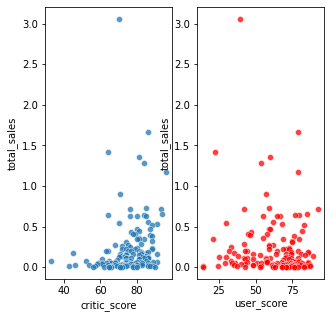

In [60]:
fig = plt.figure(figsize=(5,5))
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
sns.scatterplot(data=PC_stat, x="critic_score", y="total_sales",alpha=0.75, ax=ax_1)
sns.scatterplot(data=PC_stat, x="user_score", y="total_sales",alpha=0.75, ax=ax_2, color='red')

На графике можно найти интересную точку с продажей более 3 млн копий - критики оценили игру примерно на 70 баллов, а пользователи дали всего около 40 баллов.

In [61]:
PC_stat[PC_stat['total_sales'] > 3]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,pc,2014.0,simulation,1.0,1.82,0.0,0.23,70.0,39.0,t,3.05


`The Sims 4` — иллюстрация, что пользователей можно убедить купить игру, даже если вышло не очень.

Т. к. на `PC` наша теория не нашла полного подтверждения, попробуем распространить ее на весь датасет.

Соотнесем предыдущие выводы с продажами игр на других платформах.

Посмотрим, сохраняется ли корреляция, между продажами и оценками критиков, которую мы выявили на `PS4` на других платформах

In [62]:
#берем выборку из общего датасета без привязки к платформе за актуальный период
df_actual[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.502221,0.313700
user_score,0.502221,1.000000,-0.002608
total_sales,0.313700,-0.002608,1.000000


На всем датасете картина сохраняется — мы видим положительную корреляцию между оценками критиков и продажами и отсутствие корреляции между оценками пользователей и продажами. Кажется, мы нашли первый вывод исследования — критиков надо "задобрить", если хочешь продать много копий игры.

Заметим, что коэффициент корреляции на всем датасете "застрял" где-то между значением по PS4 и по PC — 0,31

### Продажи игр, выпущенных на нескольких платформах

Интересно, способствует ли продажам выход игр на несколько платформ одновременно.

In [63]:
#создаем вспомогательный датасет, в котором посчитаем на скольки платформах выходила игра
games_platform = df_actual.pivot_table(index=['name'],
                                       values=['platform'],
                                       aggfunc=['count']).reset_index(level=['name'])

In [64]:
# и еще один, в котором посчитаем общие продажи игры на всех платформах
games_sales = df_actual.pivot_table(index=['name'],
                                   values=['total_sales'],
                                   aggfunc=['sum']).reset_index(level=['name'])

In [65]:
#теперь объединим их в сводный датасет
games_sales = games_sales.merge(games_platform, on=['name'], how='outer')

C:\Users\rizho\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [66]:
games_sales.columns = ['name','total_sales','platform_amount']

In [67]:
games_sales.head(10)

,name,total_sales,platform_amount
0,Beyblade Burst,0.03,1
1,Fire Emblem Fates,1.67,1
2,Frozen: Olaf's Quest,1.10,2
3,Haikyu!! Cross Team Match!,0.04,1
4,1/2 Summer +,0.01,1
5,12-Sai. Honto no Kimochi,0.07,1
6,12-Sai. Koisuru Diary,0.05,1
7,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,0.11,1
8,2014 FIFA World Cup Brazil,1.04,2
9,3DS Classic Collection,0.03,1


Посмотрим на средние значения продаж в зависимости от количества платформ, на которых выпущена игра.

In [68]:
games_sales.pivot_table(index=['platform_amount'], values=['total_sales'])

,total_sales
platform_amount,
1,0.343633
2,0.507699
3,1.354921
4,2.228043
5,5.441522
6,7.175714
7,2.722857
8,5.928333
9,12.935000


In [69]:
games_sales.pivot_table(index=['platform_amount'], values=['total_sales']).reset_index(level=['platform_amount']).corr()

,platform_amount,total_sales
platform_amount,1.000000,0.834137
total_sales,0.834137,1.000000


Видно, что выручка растет по мере адаптации игры к большему количеству платформ, но прямой связи все-таки нет — у игр(ы) выпущенной на 7 платформах оказалась средняя выручка меньше, чем у тех, что выпущенны на 5 или 6 платформах.

Попробуем проверить гипотезу, о том, что по мере увеличения платформ на которых выпущенна игра, растет и средняя выручка. Сводную таблицу разобьем на две группы — игры, выпущенные только на одной платформе, и игры, выпущенные на нескольких платформах.

In [70]:
single_platform_games = games_sales[games_sales['platform_amount'] == 1]
multi_platform_games = games_sales[games_sales['platform_amount'] != 1]

Предположим, что средние продажи мультиплатформенных игр на каждой платформе выше средних продаж игр, выпущенных только для одной приставки.

Нулевой гипотезой будет обратное утверждение: **Средние продажи мультиплатформенных игр на каждой платформе, для которых они адаптированы, равны средним продажам игр, выпущенным только на одной платформе**. Соответвенно, альтернативная гипотеза: **Средние продажи мультиплатформенных игр на каждой из платформ не равны средним продажам игр, локализованных на одной приставке.**

In [71]:
alpha = .05
results = st.ttest_ind(single_platform_games['total_sales'].dropna(),
                       multi_platform_games['total_sales'].dropna(),
                       equal_var=False)


if results.pvalue < alpha:
    print('P-value: ',results.pvalue,'\n','Нулевая гипотеза отброшена', sep='')
else:
    print('P-value: ',results.pvalue,'\n','Нулевая гипотеза не может быть отброшена', sep='')

P-value: 3.879877790776443e-12
Нулевая гипотеза отброшена


Таким образом, статистические данные противоречат нашей нулевой гипотезе, а значит, увеличение платформ приводит и к росту выручки.

### Распределение игр по жанрам

Мы рассмотрели игры по годам выпуска, платформам, оценкам критиков и пользователей. Самое время взглянуть на них в разрезе жанров.

In [72]:
# отбираем значения после 2012 года и строим по ним сводную таблицу
df_by_genre = df_actual.pivot_table(index=['genre'],
                                    values=['total_sales','critic_score','user_score'],
                                    aggfunc=['count','mean','median'],
                                    margins=True)

In [73]:
df_by_genre

count                                mean              \
             critic_score total_sales user_score critic_score total_sales   
genre                                                                       
action                313         766        389    71.453674    0.420196   
adventure              47         245         60    72.638298    0.096490   
fighting               42          80         48    69.595238    0.441375   
misc                   43         155         52    73.279068    0.405290   
platform               51          74         58    73.823532    0.576081   
puzzle                  7          17          7    75.571426    0.186471   
racing                 61          85         65    71.229507    0.469294   
role-playing          127         292        136    73.472443    0.499623   
shooter               134         187        156    72.917908    1.245882   
simulation             28          62         31    64.857140    0.350968   
sports                112         214        160    71.660713    0.703972   
strategy               26          56         30    74.576920    0.180000   
All                   976         976        976    72.185448    0.731516   

                              median                         
             user_score critic_score total_sales user_score  
genre                                                        
action        68.375321         73.0       0.110       71.0  
adventure     74.616667         72.0       0.030       75.0  
fighting      70.375000         72.0       0.125       75.0  
misc          69.750000         75.0       0.100       70.0  
platform      67.137931         77.0       0.225       71.0  
puzzle        74.714286         71.0       0.060       75.0  
racing        60.800000         74.0       0.120       62.0  
role-playing  73.764706         74.0       0.125       76.0  
shooter       63.423077         76.0       0.450       65.5  
simulation    60.548387         69.5       0.100       68.0  
sports        52.381250         77.0       0.240       55.0  
strategy      61.833333         79.0       0.080       71.0  
All           67.390369         74.0       0.250       71.0

О количестве игр по жанрам в датасете мы будем смотреть по счетчику по столбцу `total_sales`, т. к. в нем нет пропусков.

Видно, что за последние 5 лет (с 2012 по 2016 год), выпускались преимущественно игры в жанре `Action`. Кроме того, было выпущено достаточно много игр в жанрах `Adventure`, `Role-Playing`, `Shooter`, `Sports` и `Misc`.

При средней оценке критиков 72 балла, на общем фоне выделяются игры жанров `Strategy` и `Puzzle` c 74,57 и 75,57 баллами соответственно. Учитывая, что раннее мы выясни, как важны оценки критиков для продаж, можно было целиться в эти жанры. Особенно интересно, что медианная оценка критиков для стратегий составляет 79 баллов - в выборке очевидно есть слабые игры этого жанра, но 50% стратегий высоко оценены профессионалами отрасли.

Средние оценки пользователей по жанрам сильно отличаются от оценок критиков. Для большинства жанров эта оценка ниже, но для `Adventure` и `Fighting` она выше. 

Наиболее интресны для нас конечно данные о продажах. Интересно, что `Adventure`, которые как мы раньше выяснили тепло принимают игроки, совсем не находится в лидерах продаж. Основного внимания с точки зрения бизнеса заслуживает жанр `Shooter` — У него значительно выше средние продажи (по отколенению от медианы, можно сказать что их обеспечили несколько сверхпопулярных игр). Но и медианые продажи сильно превышают значения по датасету в целом (на 0,2 млн копий). Также следует присмотреться к жанрам `Sports` и `Platform`.

Построим для продаж игр по жанрам диаграмму размаха, чтобы увидеть нормальные значения продаж, а также сравнить медианные значения.

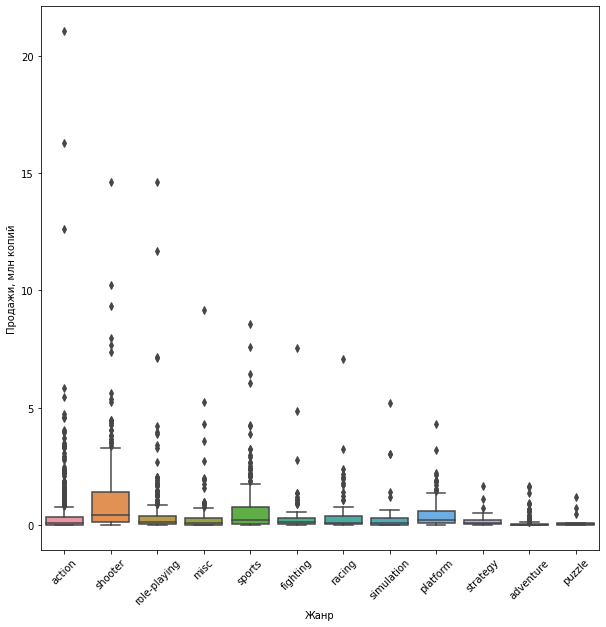

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df_actual, x='genre', y='total_sales')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.xticks(rotation = 45)
plt.show()

На графике в таком масштабе видно, что главные хиты - т.е. выбросы - приходятся на игры трех жанров: `action`, `shooter` и `role-playing`. Однако, мы не видим медианнное значение и диапозон нормальных значений. Чтобы взглянуть на эту информацию, построим еще одну диаграмму размаха, установив лимит по оси Y (млн проданных копий)

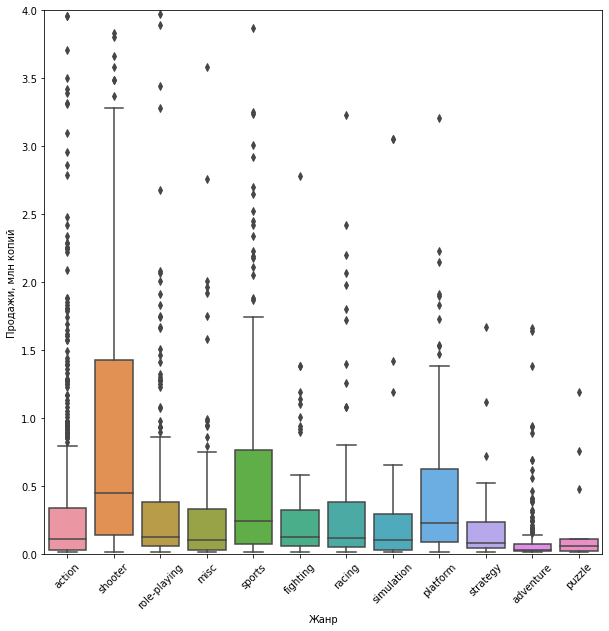

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df_actual, x='genre', y='total_sales')
ax.set_ylim(0,4)
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.xticks(rotation = 45)
plt.show()

Первое, что бросается в глаза - диапозон нормальных значений у жанра `shooter` в несколько раз шире, чем у жанров  `role-playing`, `misc`, `fighting` и других, а медиана лежит выше 75%-квартиля жанров `racing`, `strategy`,а где-то даже выше "усов" верхней границы нормальных значений (`adventure`).

Также мы видим, что у жанров `sports` и `platform` высокие 75% квартили — значит, большая доля игр продавалась большими тиражами.

## Портрет пользователей по регионам

Выше мы рассмотривали агрегированные продажи по всем регионам, но можно предположить, что пользователи в Америке и Японии отличаются. 

### Популярность платформ по регионам

In [76]:
# делаем срез из общего датасета с играми, выпущенными с 2013 года, для которых известны продажи в Северной Америке 

NA_df = df_actual[df_actual['na_sales']>0][['name','platform','genre','na_sales','rating']]

In [77]:
# аналогично для Японии
JP_df = df_actual[df_actual['jp_sales']>0][['name','platform','genre','jp_sales','rating']]

In [78]:
# и для Европы
EU_df = df_actual[df_actual['eu_sales']>0][['name','platform','genre','eu_sales','rating']]

Определим ТОП-5 по каждому региону.

In [79]:
NA_df_top5 = (NA_df.pivot_table(index=['platform'],aggfunc=['mean'])
             .reset_index(level=['platform'])
             .sort_values(by=[('mean', 'na_sales')], ascending=False).head(5))

In [80]:
JP_df_top5 = (JP_df.pivot_table(index=['platform'],aggfunc=['mean'])
             .reset_index(level=['platform'])
             .sort_values(by=[('mean', 'jp_sales')], ascending=False).head(5))

In [81]:
EU_df_top5 = (EU_df.pivot_table(index=['platform'],aggfunc=['mean'])
             .reset_index(level=['platform'])
             .sort_values(by=[('mean', 'eu_sales')], ascending=False).head(5))

In [82]:
NA_df_top5

,platform,mean
,,na_sales
8,x360,0.480353
6,wii,0.468571
9,xone,0.410220
4,ps4,0.369864
0,3ds,0.321008


In [83]:
JP_df_top5

,platform,mean
,,jp_sales
0,3ds,0.288553
6,wiiu,0.190877
1,ps3,0.098941
2,ps4,0.071570
4,psv,0.058829


In [84]:
EU_df_top5

,platform,mean
,,eu_sales
4,ps4,0.486517
3,ps3,0.319858
7,wii,0.269545
0,3ds,0.253770
9,x360,0.251598


Для наглядности различий по платформам выведем гистограммы по продажам в каждом регионе для разных платформ.

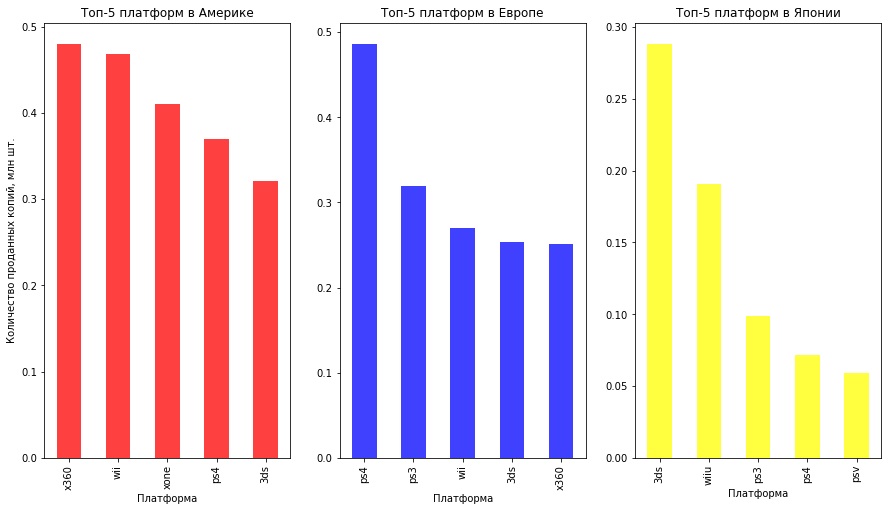

In [85]:
fig = plt.figure(figsize=(15,8))

ax_1 = fig.add_subplot(1,3,1)
ax_2 = fig.add_subplot(1,3,2)
ax_3 = fig.add_subplot(1,3,3)
plt.title('ТОП-5 платформ по продажам по регионам')
NA_df_top5.plot(kind='bar',
                x='platform',
                y=['mean'],
                alpha=0.75,
                ax=ax_1,
                color='red',
                legend=False)
ax_1.set_title('Топ-5 платформ в Америке')
ax_1.set_xlabel('Платформа')
ax_1.set_ylabel('Количество проданных копий, млн шт.')
EU_df_top5.plot(kind='bar',
                x='platform',
                y=['mean'],
                alpha=0.75,
                ax=ax_2,
                color='blue',
                legend=False)
ax_2.set_title('Топ-5 платформ в Европе')
ax_2.set_xlabel('Платформа')
JP_df_top5.plot(kind='bar',
                x='platform',
                y=['mean'],
                alpha=0.75,
                ax=ax_3,
                color='yellow',
                legend=False)
ax_3.set_title('Топ-5 платформ в Японии')
ax_3.set_xlabel('Платформа')
plt.show()

Можно заметить, что в целом рынки отличаются по объему - средние продажи в Японии ни на одной платформе не превысили 0,3 млн копий, в то время как в Америке и Европе продажи на одной или нескольких платформах стремятся к 0,5 млн копий.

Гораздо интреснее сравнить средние продажи и выяснить разницу предпочтений пользователей.

Японский рынок одназначно самобытный — портативная приставка Nintendo 3DS, представленная в конце 2011 года, в лидерах продаж за исследуемый период. Второе место по популярности занимает еще одна разработка Nintendo — `WiiU`. На других рынках `WiiU` еще уступает своему предыдущему поколению — `Wii`.

В Европе по c заметным отрывом лидирует `PS4` — в среднем, игра на нее продается в количестве почти 0,5 млн копий. `XBox 360` и `XBox One`здесь заметно уступают долю рынка `Play Station` — а вот в Америке, напротив, лидирует именно разработка местного `Microsoft`. Очень патриотично.

Кстати, семейство `Xbox` совсем не популярно в Японии. Возможно, маркетологи `Nintendo` и `Sony` отлично понимают домашний рынок, а может помогают пошлины.

В предыдущем анализе мы оставили только популярные платформы, однако менее распространенные могут давать существенную долю продаж:

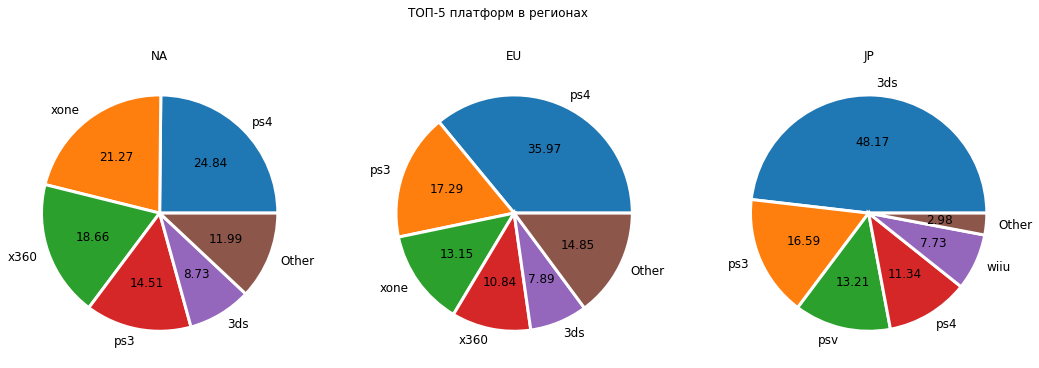

In [96]:
# задаем список регионов
countries = df_actual.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (df_actual.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = (df_i.append({'platform': 'Other', countries[i]: df_actual[countries[i]].sum() 
                       - df_i[countries[i]].sum()}, ignore_index= True)
         )
    
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%.2f',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'large'})

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

В Японии рынок почти полностью захвачен "конгломератами" — а вот в Европе есть место конкуренции.

### Популярность жанров по регионам

Итак, японцы играют на японских платформах, американцы выбирают американское, но и с азиатскими `Play Station` c `Wii` не прочь поразвлечься, а  европейцы влюблены в `PS4`.

Теперь посмотрим на жанры.

In [86]:
df[df['year_of_release'] > 2012].pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'])

,eu_sales,jp_sales,na_sales
genre,,,
action,0.154217,0.052859,0.164556
adventure,0.033673,0.023755,0.029143
fighting,0.106875,0.095625,0.194375
misc,0.129290,0.059355,0.177355
platform,0.210541,0.064730,0.245135
puzzle,0.058824,0.069412,0.048824
racing,0.237529,0.027059,0.152471
role-playing,0.126610,0.174795,0.158904
shooter,0.469840,0.035348,0.586845


Много строк - лучше посмотрим график. Вывыдем средние продажи игр разных жанров на одном графике.

<AxesSubplot:ylabel='genre'>

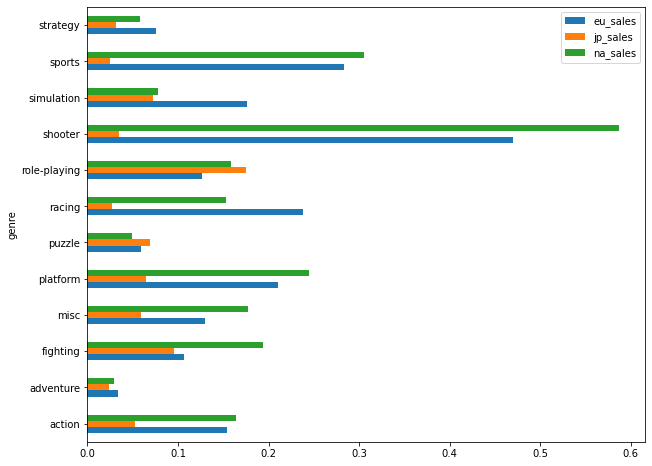

In [87]:
df[df['year_of_release'] > 2012].pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales']).plot(kind='barh',figsize=(10,8))

Япония снова не такая как все. Наиболее популярные тут жанры — `Role-Playing`, `Fighting` и `Simulation`.

А вот Европа и Америка не сильно отличаются в своих вкусовых предпочтениях — и тут, и там лидируют по продажам игры жанра `Shooter` и `Sports`. Разве что в Европе чуть популярнее `Racing` и `Simulation`, а в Америке `Fighting`.

Интересно, что среднее количество проданных копий игр жанров `Puzzle`  и `Adventure` почти не отличается по рынкам, несмотря на различие в объемах рынков в целом. Хотите заработать, но боитесь рисковать — сделайте головоломку.

### Влияние рейтинга ESRB на продажи

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

Ниже мы попытаемся определить, влияют ли эти рейтинги на продажи в различных регионах.


In [88]:
df[df['year_of_release'] > 2012].pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'])

,eu_sales,jp_sales,na_sales
rating,,,
e,0.276026,0.050132,0.261755
e10+,0.169405,0.023373,0.215238
m,0.393821,0.038238,0.447724
t,0.125976,0.061832,0.149520
undefined,0.080768,0.087052,0.091525


В датасете присутствуют игры следующих рейтингов:
- `E` — "Everyone" — такие игры подходят любой возрастной категории;
- `E10` — "Everyone 10 and older" — для всех старше 9 лет;
- `T` — "Teen" — для подростков от 13 лет;
- `M` — "Mature" — материалы игры не подходят для возрастной категории младше 17 лет.
- `undefined` - те строки, для которых не был указан рейтинг.

Мы видим, что в Европе и Америке средние продажи игр для взрослой возрастной категории выше остальных, а в Японии - игр категорий  `E` и `T`. Таким образом, можно предположить, что в Америке и Европе большое количество взрослых геймеров, хотя эта теория требует более детальной проверки, которую невозможно осуществить в рамках предоставленного датасета.

Попробуем заменить рейтинги на числовые значения для подсчета корреляции между ними и продажами. Для этого заменим значения рейтинга по возрастанию "потенциального" возраста аудитории — E:1, E10:2, T:3, M:4. В этом случае положительный коэффициент корреляции будет говорить о росте продаж в регионе по мере увеличения жестокости и непристойности в игре.

In [89]:
# определим функцию, которая вернет числовое значение в зависимости от рейтинга или NaN, если рейтинга нет
def set_rating(row):
    if row['rating'] == 'e':
        return 1
    elif row['rating'] == 'e10':
        return 2
    elif row['rating'] == 't':
        return 3
    elif row['rating'] == 'm':
        return 4
    else:
        return 0

In [90]:
df['numeric_rating'] = df.apply(set_rating, axis=1)

In [91]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,numeric_rating
0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,e,82.54,1
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24,0
2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,83.0,e,35.52,1
3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,80.0,e,32.77,1
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38,0
5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined,30.26,0
6,New Super Mario Bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,85.0,e,29.80,1
7,Wii Play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,66.0,e,28.91,1
8,New Super Mario Bros. Wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,84.0,e,28.32,1
9,Duck Hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined,28.31,0


<AxesSubplot:>

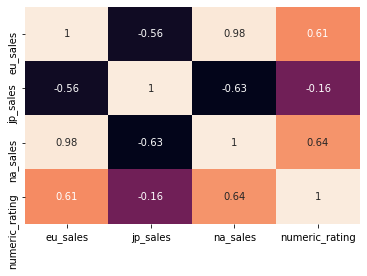

In [92]:
sns.heatmap(df[df['year_of_release'] > 2012].pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales','numeric_rating']).corr(),
            annot = True,
            cbar=False)

И так, мы видим, что между продажами и потенциально взрослым контентом в игре достаточно сильная прямая корреляции в Америке, более слабая в Европе, и отрицательная — в Японии.

Конечно, это только отдаленный взгляд на проблему — корреляция Пирсона показывает линейную зависимость, а продажи игр, как мы уже выяснили, сложных процесс, на который одноврменно влияет множество факторов — жанр, платформа и т.д.

Построим диаграммы размаха по регионам для разных рейтингов.

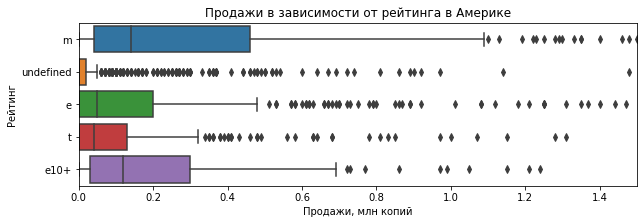

In [93]:
fig, ax = plt.subplots(figsize=(10,3))
sns.boxplot(data=df_actual,
            y='rating',
            x='na_sales',
            orient="h")
ax.set_xlim(0,1.5)
ax.set_title('Продажи в зависимости от рейтинга в Америке')
ax.set_xlabel('Продажи, млн копий')
ax.set_ylabel('Рейтинг')
plt.show()


Итак, у игр с рейтингом `M` в Америке наиболее широкий диапозон нормальных значений, а также выше медианное значение. Более того, 25% квартиль не упирается в ноль — преуспеть с жестокой игрой на этом рынке кажется совсем не трудно.

Игры с рейтингом `e10+` также имеют высокое медианное значение и широкий диапозон нормальных значений. 

Игры без рейтинга на этом рынке крайне неоднородны — большинство из них не продаются широкими тиражами, но мы также можем наблюдать и большое количество выбросов, которые говорят — рейтинг ESRB не главное.

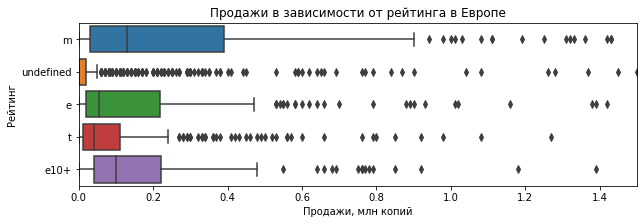

In [94]:
fig, ax = plt.subplots(figsize=(10,3))
sns.boxplot(data=df_actual,
            y='rating',
            x='eu_sales',
            orient="h")
ax.set_xlim(0,1.5)
ax.set_title('Продажи в зависимости от рейтинга в Европе')
ax.set_xlabel('Продажи, млн копий')
ax.set_ylabel('Рейтинг')
plt.show()

В Европе картина немного меняется. У игр с рейтингами `e` и `t`, предназначенных для более широкой аудитории, 25% квартили уже "отстают" от нуля. Таким образом, тут рейтинг не так сильно влияет на продажи и строить прогнозы по нему не стоит.

Наконец, Япония.

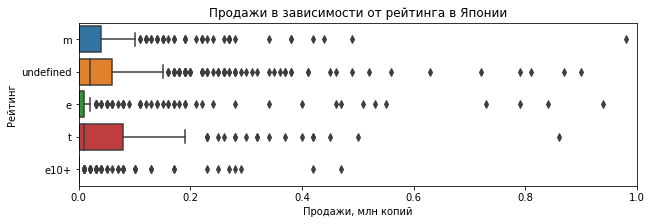

In [95]:
fig, ax = plt.subplots(figsize=(10,3))
sns.boxplot(data=df_actual,
            y='rating',
            x='jp_sales',
            orient="h")
ax.set_xlim(0,1) # диапозон оси уменьшен, т.к. ранее мы выяснили, что этот рынок меньше по объему
ax.set_title('Продажи в зависимости от рейтинга в Японии')
ax.set_xlabel('Продажи, млн копий')
ax.set_ylabel('Рейтинг')
plt.show()

А вот тут картина совершенно другая. Игры для категории 17+ отзодят на третий план, а вперед выходят игры без рейтинга (вероятно, играм на этом рынке просто не нужно получать рейтинг), а также игры с рейтингом `E`. Японцы умеют получать удовольствие без насилия и откровенных сцен.

<div class="alert alert-info"> <b>Комментарий студента:</b> Чистый кайф.</div>

## Проверка гипотез

Цель исследования проверка двух гипотез:

- средние пользовательские рейтинги платформ `XOne` и `PC` одинаковые;
- средние пользовательские рейтинги жанров `Action`и `Sports` разные.

### Проверка гипотезы о равенстве рейтингов на платформах XOne и PC

Для начала посмотрим на соотношение игр на интересующих нас платформах. Возьмем только актуальный период.

In [97]:
# срез по играм после 2012 года на PC.
pc_games = df_actual[df_actual['platform']=='pc']
display(pc_games.describe())
pc_games['user_score'].isna().sum() # количество неопределенных значений в интересующем нас столбце

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,189.000000,189.000000,189.000000,189.0,189.000000,149.000000,155.000000,189.000000
mean,2014.634888,0.058783,0.134180,0.0,0.015661,75.550339,62.696774,0.208624
std,1.100796,0.127805,0.212022,0.0,0.030198,10.508964,17.423813,0.352304
min,2013.000000,0.000000,0.000000,0.0,0.000000,33.000000,14.000000,0.010000
25%,2014.000000,0.000000,0.020000,0.0,0.000000,70.000000,53.000000,0.030000
50%,2015.000000,0.000000,0.060000,0.0,0.000000,77.000000,68.000000,0.080000
75%,2016.000000,0.080000,0.130000,0.0,0.020000,83.000000,76.000000,0.230000
max,2016.000000,1.000000,1.820000,0.0,0.230000,96.000000,93.000000,3.050000


34

In [98]:
# аналогично для игр на XOne

xone_games = df_actual[df_actual['platform']=='xone']

display(xone_games.describe())

xone_games['user_score'].isna().sum()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.000000
mean,2014.951416,0.377004,0.208866,0.001377,0.057773,73.325447,65.214286,0.645020
std,0.952996,0.630618,0.365306,0.005153,0.094221,12.953465,13.809406,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,16.000000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,58.000000,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,68.000000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,75.000000,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,92.000000,7.390000


65

Размеры выборок отличаются, да и дисперсии отличаются. Это нужно будет учесть при проведение проверки. 

Нулевой гипотезой будет утверждение, что:
**Средние пользовательские рейтинги на платформах XOne и PC равны**

Тогда альтернативной гипотезой будет утвреждение: **Средние пользовательские рейтинги на платформах XOne и PC отличаются**

Для проверки нулевой гипотезы проведем t-test. Выборки будем считать независимыми, а критерий значимости установим 5% — это общепринятое пороговое значение.

In [99]:
alpha = .05

results = st.ttest_ind(pc_games['user_score'].dropna(),xone_games['user_score'].dropna(), equal_var=False)

if results.pvalue < alpha:
    print('P-value: ',results.pvalue,'\n','Нулевая гипотеза отброшена', sep='')
else:
    print('P-value: ',results.pvalue,'\n','Нулевая гипотеза не может быть отброшена', sep='')

P-value: 0.1475959401343053
Нулевая гипотеза не может быть отброшена


P-value равен почти 15%, т.е. если нулевая гипотеза верна, с вероятностью почти 15% мы можем получить наблюдаемое или более экстремальное различие интересующего нас критерия (среднего значения пользовательских рейтингов). Неформально, "жизнеспособность" нулевой гипотезы - почти 15% и поэтому отбросить ее нельзя.

### Проверка гипотезы о различии средних пользовательских рейтингов жанров Action и Sports.

Для проверки второй гипотезы, сначала сделаем срез из общей выборки по интересующим нас жанрам.

In [101]:
action_games = df_actual[df_actual['genre']=='action']

display(action_games.describe())

action_games['user_score'].isna().sum()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,766.000000,766.000000,766.000000,766.000000,766.000000,313.000000,389.000000,766.000000
mean,2014.603149,0.164556,0.154217,0.052859,0.048564,71.453674,68.375321,0.420196
std,1.043717,0.542802,0.516450,0.168198,0.191316,11.906096,13.301733,1.253909
min,2013.000000,0.000000,0.000000,0.000000,0.000000,26.000000,20.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,63.000000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,73.000000,71.000000,0.110000
75%,2015.000000,0.120000,0.120000,0.050000,0.030000,79.000000,78.000000,0.337500
max,2016.000000,9.660000,9.090000,2.790000,3.960000,97.000000,91.000000,21.050000


377

У почти половины игр жанра `Action` (377 из 766) отсутствуют пользовательские оценки.

In [102]:
sports_games = df_actual[df_actual['genre']=='sports']

display(sports_games.describe())

sports_games['user_score'].isna().sum()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,214.000000,214.000000,214.000000,214.000000,214.000000,112.000000,160.000000,214.000000
mean,2014.476685,0.305000,0.282804,0.025280,0.090888,71.660713,52.381250,0.703972
std,1.094981,0.489979,0.799847,0.054114,0.188452,16.334650,17.834273,1.219237
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,2.000000,0.010000
25%,2014.000000,0.000000,0.010000,0.000000,0.000000,64.000000,41.000000,0.070000
50%,2014.500000,0.080000,0.050000,0.000000,0.020000,77.000000,55.000000,0.240000
75%,2015.000000,0.387500,0.207500,0.017500,0.097500,83.250000,65.000000,0.765000
max,2016.000000,2.490000,6.120000,0.260000,1.370000,90.000000,88.000000,8.580000


54

Игр жанра `Sports` значительно меньше, чем игр жанра `Action`, а средние оценки различаются чуть сильнее. Учтем это при проведение t-test'a. Как и при проверке первой гипотезы, критерий статистической значимости определим в 5%. Для проверки будем исходить от обратного — предположим, что средние оценки пользователей у игр интересующих нас жанров одинаковые.

Нулевая гипотеза: **Средние пользовательские оценки игр жанров `Action` и `Sports` одинаковые.**

Альтернативная гипотеза: **Средние пользовательские оценки игр жанров `Action` и `Sports` жанров отличаются**.

In [103]:
alpha = .05

results = st.ttest_ind(sports_games['user_score'].dropna(), action_games['user_score'].dropna(), equal_var=False)

if results.pvalue < alpha:
    print('P-value: ',results.pvalue,'\n','Нулевая гипотеза отброшена', sep='')
else:
    print('P-value: ',results.pvalue,'\n','Нулевая гипотеза не может быть отброшена', sep='')

P-value: 1.4460039700704734e-20
Нулевая гипотеза отброшена


Вероятность получить такие же числа, как в нашем датасете, при условии что нулевая гипотеза верна, стремится к нулю. Соответственно, нудевая гипотеза должна быть отброшена, а мы предполагаем, что средние пользовательские оценки игр `Action` и `Sports` отличаются.

## Вывод

В ходе исследования мы изучили исторические данные о продажах игр на различных платформах с 1980 по 2016 год.

На этапе обзора данных были выявлены проблемы в данных, которые пришлось обработать, прежде чем переходить к анализу. На этапе предобработки данных мы привели названия столбцов к единому регистру, для удобства дальнейшей работы. Кроме того, мы привели к нижнему регистру и категориальные значения для борьбы с возможными дубликатами. В столбце `user_score` был заменен тип данных, а значения приведены к стобальной шкале, для удобства сравнения с оценкам критиков. 

Далее датасет был проверен на явные дубликаты, а также обработаны пропуски. У большого количества игр отсутствовал рейтинг ESRB, что могло привести к ошибке при аггрегации данных по этому параметру. По этой причине мы заменили пропуски на значение `undefined` - т.е рейтинг "неопределен".

После преобработки данных, был произведен расчет общих продаж игры (в млн копий) во всех регионах.

После этого, был проанализирован выпуск игр по годам — мы выяснили, что выпуск игр рос вплоть до 2008 года, а потом пошел на спад. Однако в 2013 году рынок вновь начал расти, а конкуренция — обостряться.

При рассмотрении выпуска игр на платформах по годам, мы увидели, что срок жизни платформ сильно различается — на некоторые игры выходя всего год-два, а "мейджоры" рынка живут до 10 лет. Пик продаж на платформу обычно приходится на 2-3 год с момента выпуска, а с 5 года, даже если платформа продолжает "жить" продажи стремительно падают.

На практике это означает, что нужно выпускать игры на относительно свежие платформы, которые были выпущены не более 3 лет назад, а учитывая долгий цикл разработки современных игр лучше целиться на перспективные платформы, которые выйдут одновременно с игрой или чуть раньше.

Отдельно отметим платформа `PC` — продажи игр на персональных компьютерах следуют за рынком (график повторяет общий рисунок), и стабильно занимают долю в продажах. Таким образом, адаптация игр для `PC` может создать некоторую подушку безопасности.

По жанрам, в последний период выпускались преимущественно игры `Action`, `Adventure`, `Role-Playing`, `Shooter`, `Sports` и `Misc`. При этом по выручке лидируют `Shooter`'ы и `Sports` — соответственно, игры этих жанров и следует разрабоатывать. Однако, если нет желания гнаться за рынком, можно присмотреться к жанрам `Strategy` и `Puzzle` — в этих нишах игры получают более высокие оценки критиков и пользователей, а также неплохо продаются. 

Кстати об оценках критиков и игроков. В ходе анализа мы установили, что оценки критиков прямо коррелируются с продажами игр. Это значит, что к их мнениям стоит прислушиваться на этапе разработке. При это корреляции между оценками пользователей и продажами не обнаружено. Вероятно, это связано с тем, что критики получают копии игры до официально релиза, а игроки пишут их регрессивно, уже после приобретения.



При рассмотрении состовлении портретов игроков по регионам, мы обнаружили, что их поведение отличается. В Японии преобладают портативные игровые платформы (`Nintendo 3DO`) и `WiiU`, а в Европе и США — `PS4` и `XOne` соответвенно. Кроме того, в Японии популярные эскапические игры — ролевые и симуляторы, а в США и Европе традиционные шутеры и экшены. Интересно, что среднее количество проданных копий игр жанров `Puzzle`  и `Adventure` почти не отличается по рынкам, несмотря на различие в объемах рынков в целом. Хотите заработать, но боитесь рисковать — сделайте головоломку.

Игры для взрослых с рейтингом `M`  преобладают в продажах в Америке и Европе, а в Японии — корреляции почти нет - у большинства игр рейтинг просто отсутствует, а среди тех у которых он есть, преобладают игры с рейтингом `E`. Можно предположить, что в Западном мире больще возрастных игроков, однако, мы не знаем точно, действительно ли дети в странах Европы и Америке не имеют доступа к играм со взрослыми рейтингами или, наоборот, скупают запретный плод.

На заключительном этапе мы проверили две гипотезы: о равенстве средних оценок игр на платформах `Xbox One` и `PC`  и о различии пользовательских рейтингов игр жанров `Sports` и `Action`. Статистические данные не противоречат обоим гипотезам.

Таким образом, можно заключить, что при прогнозировании продаж на будущий год, следует ориентироваться на продажи по платформам, которые были выпущены не позднее 3 лет до прогнозного периода. Следует ожидать, что продажи традиционно популярных жанров `Shooter` и `Sports` будут выше, чем игр остальных жанров, однако следуте также рассматривать тендцении по жанрам за последние несколько лет. Кроме того, необходимо учесть оценки критиков при прогнозе продаж конкретной игры — потенциальные покупатели доверяют их мнению.